# Plotting Practice Part 2

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
flights = sns.load_dataset('flights')
fmri = sns.load_dataset('fmri')
penguins = sns.load_dataset('penguins')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

## Relational Plots

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


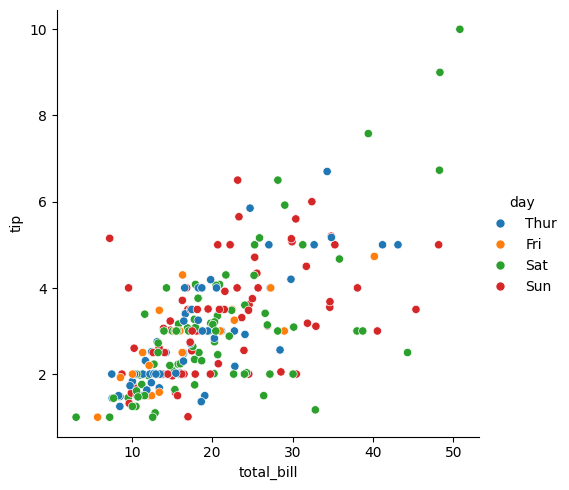

In [5]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day")

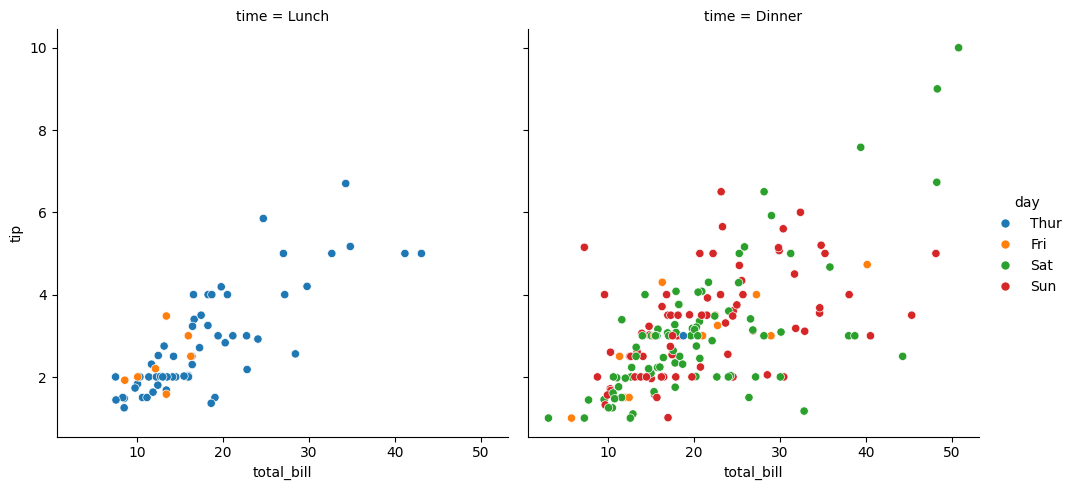

In [6]:
# col var gives us multiple plots for the daytimes
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")

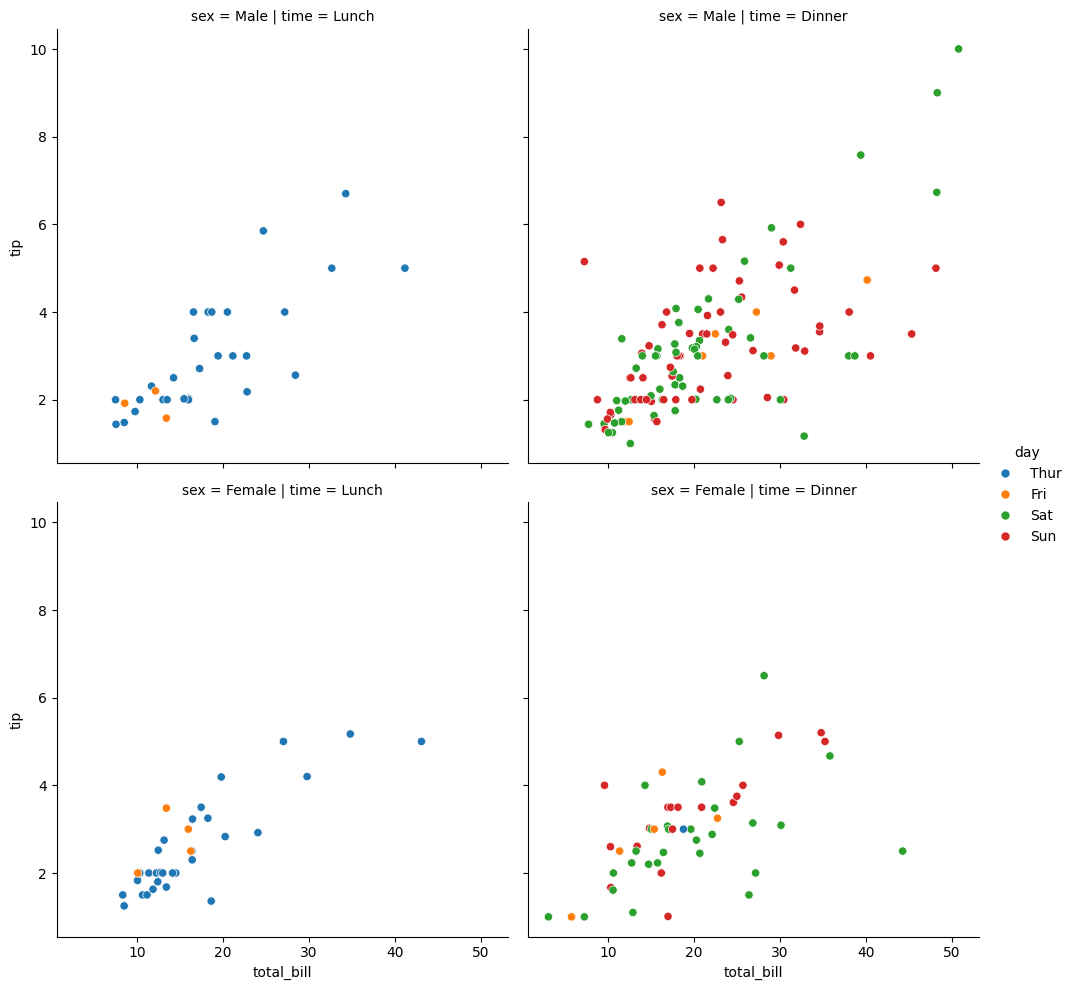

In [7]:
# row + col vars give us a so to say plot matrix 2x2 in this case
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex")

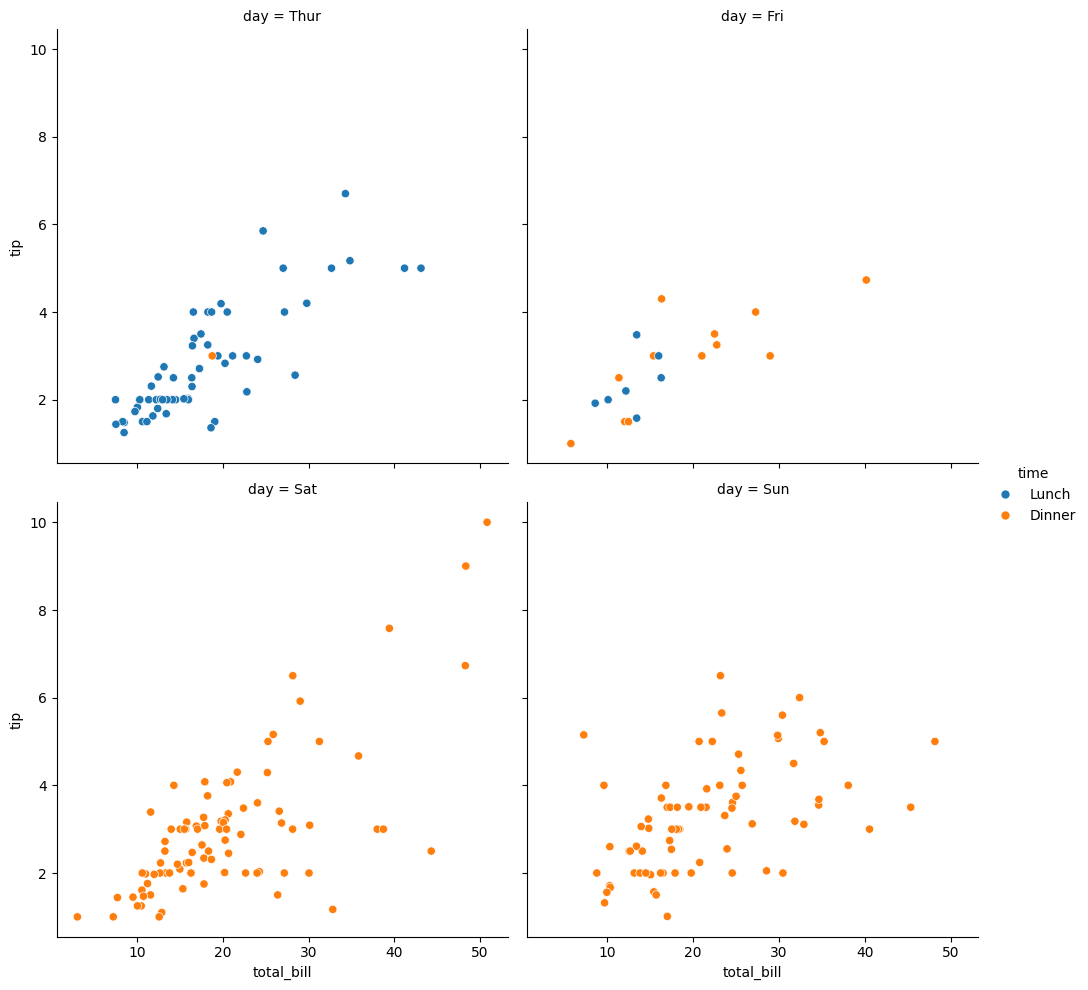

In [8]:
# wrapping the column(to 2) creates 2 rows 
sns.relplot(data=tips, x="total_bill", y="tip", hue="time", col="day", col_wrap=2)

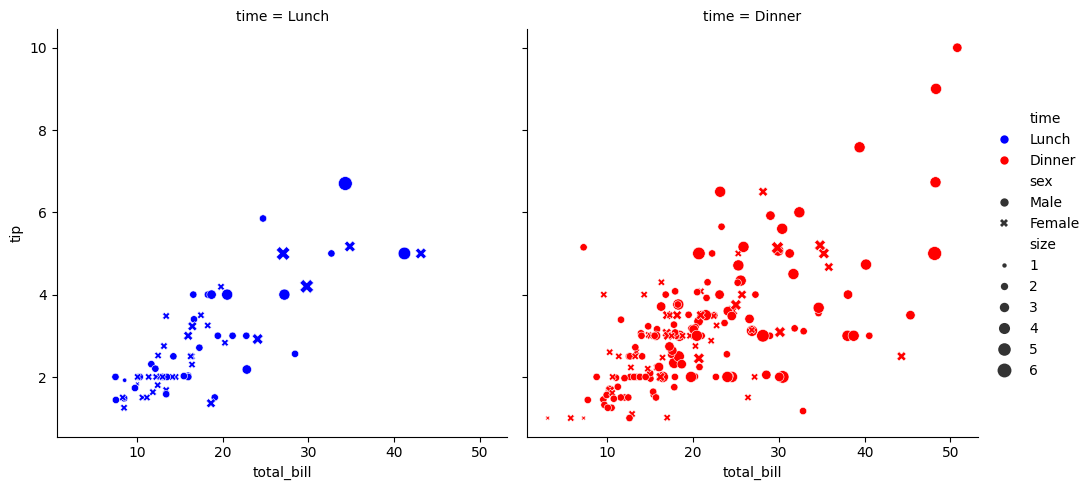

In [9]:
# multiple variables using style = ...
sns.relplot(
    data=tips, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["b", "r"], sizes=(10, 100)
)

## Continouus Values -> Lineplot

In [10]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


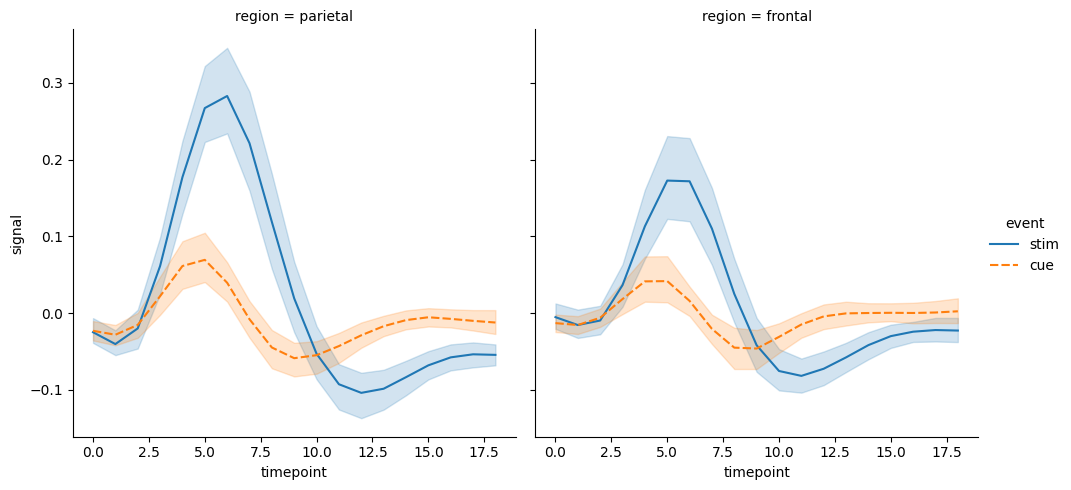

In [11]:
sns.relplot(
    data=fmri, x="timepoint", y="signal", col="region",
    hue="event", style="event", kind="line",
)

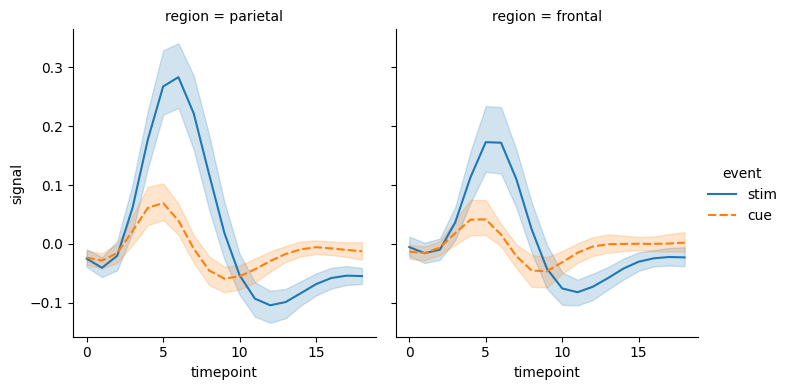

In [12]:
sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.9, kind="line"
)

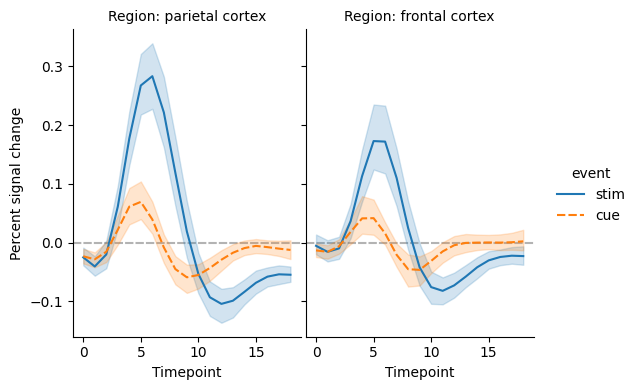

In [19]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
(g.map(plt.axhline, y=0, color=".7", dashes=(4, 1), zorder=0)
  .set_axis_labels("Timepoint", "Percent signal change")
  .set_titles("Region: {col_name} cortex")
  .tight_layout(w_pad=0))

In [21]:
flights_wide = (
    sns.load_dataset("flights")
    .pivot(index="year", columns="month", values="passengers")
)
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


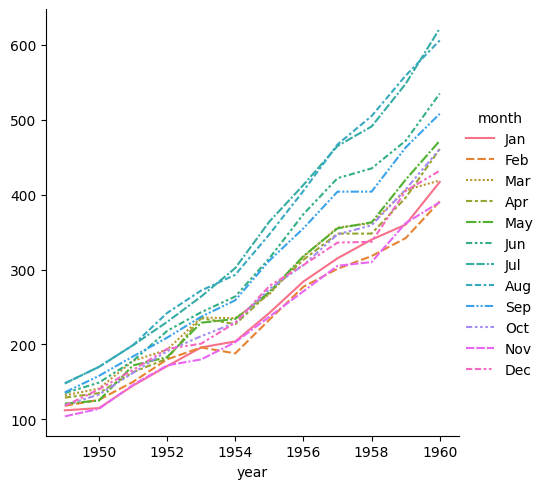

In [22]:
sns.relplot(data=flights_wide, kind="line")